## Working through example of neural network from scratch

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Creating data

In [4]:
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
Xnorm = X/X.max()
y = np.array(([75], [82], [93]), dtype=float)
ynorm = y/100

In [5]:
class Neural_Network(object):
    def __init__(self):
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Initialize Parameters (Weights)
        self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1) #formula 1
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X, y. Use weights already stored in class
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W1 and W2
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        
        return dJdW1, dJdW2

In [6]:
NN = Neural_Network()

In [7]:
dJdW1, dJdW2 = NN.costFunctionPrime(Xnorm, ynorm)

In [8]:
dJdW2

array([[-0.02035568],
       [-0.02183149],
       [-0.02635367]])

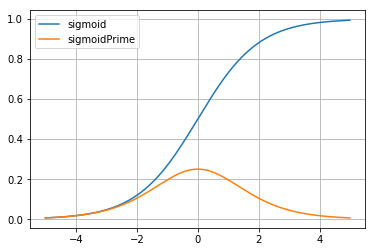

In [9]:
def sigmoid(z):
    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))
    
def sigmoidPrime(z):
    #Derivative of Sigmoid Function
    return np.exp(-z)/((1+np.exp(-z))**2)

testValues = np.arange(-5,5,0.01)
plt.plot(testValues, sigmoid(testValues))
plt.plot(testValues, sigmoidPrime(testValues))
plt.grid(1)
plt.legend(['sigmoid','sigmoidPrime']);